In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from string import letters
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [59]:
df = pd.read_csv("person.csv")

In [60]:
df.head()

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,127,1,1,2,...,240,0,0,0,0,0,0,7,1,0
1,1,10002,1,1,1,0,83,1,1,22,...,2213,0,0,0,0,0,0,7,1,0
2,1,10003,1,1,1,0,11,1,1,1,...,125,0,0,0,0,0,0,7,2,0
3,1,10003,1,1,2,0,11,1,1,1,...,8888,999,99,0,0,0,8,0,0,0
4,1,10004,1,1,1,0,45,4,1,0,...,57,0,0,0,0,0,0,7,1,0


In [61]:
X = df

In [62]:
X.columns

Index([u'STATE', u'ST_CASE', u'VE_FORMS', u'VEH_NO', u'PER_NO', u'STR_VEH',
       u'COUNTY', u'DAY', u'MONTH', u'HOUR', u'MINUTE', u'RUR_URB',
       u'FUNC_SYS', u'HARM_EV', u'MAN_COLL', u'SCH_BUS', u'MAKE', u'MAK_MOD',
       u'BODY_TYP', u'MOD_YEAR', u'TOW_VEH', u'SPEC_USE', u'EMER_USE',
       u'ROLLOVER', u'IMPACT1', u'FIRE_EXP', u'AGE', u'SEX', u'PER_TYP',
       u'INJ_SEV', u'SEAT_POS', u'REST_USE', u'REST_MIS', u'AIR_BAG',
       u'EJECTION', u'EJ_PATH', u'EXTRICAT', u'DRINKING', u'ALC_DET',
       u'ALC_STATUS', u'ATST_TYP', u'ALC_RES', u'DRUGS', u'DRUG_DET',
       u'DSTATUS', u'DRUGTST1', u'DRUGTST2', u'DRUGTST3', u'DRUGRES1',
       u'DRUGRES2', u'DRUGRES3', u'HOSPITAL', u'DOA', u'DEATH_DA', u'DEATH_MO',
       u'DEATH_YR', u'DEATH_HR', u'DEATH_MN', u'DEATH_TM', u'LAG_HRS',
       u'LAG_MINS', u'P_SF1', u'P_SF2', u'P_SF3', u'WORK_INJ', u'HISPANIC',
       u'RACE', u'LOCATION'],
      dtype='object')

In [63]:
# After going through the FARS dataset User guige, I found the following columns to be least useful when forming relation with
# our requirement, Hence I've dropped these variables.
X = X.drop(['COUNTY','VE_FORMS','VEH_NO','MOD_YEAR','STR_VEH','FUNC_SYS','HARM_EV','MAN_COLL','SCH_BUS','IMPACT1','FIRE_EXP',
            'BODY_TYP','TOW_VEH','SEAT_POS','REST_USE','REST_MIS','AIR_BAG','HOUR','SPEC_USE','EMER_USE','MINUTE','MAKE',
            'MAK_MOD','ROLLOVER','EJECTION','EJ_PATH','EXTRICAT','DEATH_YR','DEATH_HR','DEATH_MN','DEATH_TM','LAG_HRS',
            'LAG_MINS','P_SF1','P_SF2','P_SF3','LOCATION', 'HOSPITAL'], axis=1)
X.head()

,STATE,ST_CASE,PER_NO,DAY,MONTH,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,...,DRUGTST3,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE
0,1,10001,1,1,1,1,68,1,1,4,...,0,1,0,0,7,1,1,0,7,1
1,1,10002,1,1,1,1,49,1,1,4,...,1,358,996,996,7,1,1,0,7,1
2,1,10003,1,1,1,1,31,1,1,4,...,0,1,0,0,7,1,1,0,7,2
3,1,10003,2,1,1,1,20,2,2,2,...,0,0,0,0,0,88,88,8,0,0
4,1,10004,1,4,1,1,40,1,1,4,...,0,1,0,0,7,4,1,0,7,1


In [64]:
X.columns

Index([u'STATE', u'ST_CASE', u'PER_NO', u'DAY', u'MONTH', u'RUR_URB', u'AGE',
       u'SEX', u'PER_TYP', u'INJ_SEV', u'DRINKING', u'ALC_DET', u'ALC_STATUS',
       u'ATST_TYP', u'ALC_RES', u'DRUGS', u'DRUG_DET', u'DSTATUS', u'DRUGTST1',
       u'DRUGTST2', u'DRUGTST3', u'DRUGRES1', u'DRUGRES2', u'DRUGRES3', u'DOA',
       u'DEATH_DA', u'DEATH_MO', u'WORK_INJ', u'HISPANIC', u'RACE'],
      dtype='object')

### Since the data file from the website contains only numeric equivalents of the actual data, I will replace the numeric lables with its counterpart from the user guide. This will allow me to examine the data more easily.

Texas                   8275
California              7622
Florida                 7063
Georgia                 3294
North Carolina          3121
New York                2675
Pennsylvania            2673
Ohio                    2511
Michigan                2353
South Carolina          2249
Arizona                 2164
Illinois                2164
Tennessee               2131
Missouri                1977
Indiana                 1902
Alabama                 1880
Kentucky                1681
Louisiana               1637
Virginia                1487
Oklahoma                1484
Mississippi             1427
Washington              1391
New Jersey              1332
Colorado                1286
Wisconsin               1266
Maryland                1165
Arkansas                1131
Oregon                   995
Minnesota                953
Nevada                   804
Kansas                   758
Utah                     705
New Mexico               699
Iowa                     666
Massachusetts 

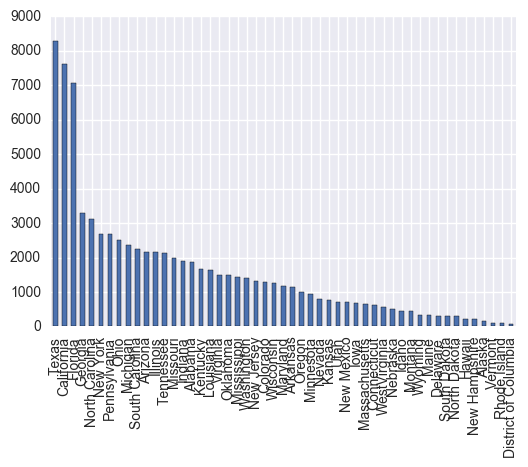

In [65]:
replacements = {
   'STATE': {1:'Alabama', 31:'Nebraska', 2:'Alaska', 32:'Nevada',4:'Arizona', 33:'New Hampshire', 5:'Arkansas', 34:'New Jersey',
             6: 'California', 35:'New Mexico', 8:'Colorado', 36:'New York', 9:'Connecticut', 37:'North Carolina', 10:'Delaware',
             38:'North Dakota', 11:'District of Columbia', 39:'Ohio', 12:'Florida', 40:'Oklahoma', 13:'Georgia', 41:'Oregon',
             15:'Hawaii', 42:'Pennsylvania', 16:'Idaho', 43:'Puerto Rico', 17:'Illinois', 44:'Rhode Island', 18:'Indiana',
             45:'South Carolina', 19:'Iowa', 46:'South Dakota', 20:'Kansas', 47:'Tennessee', 21:'Kentucky', 48:'Texas', 
             22:'Louisiana', 49:'Utah', 23:'Maine', 50:'Vermont', 24:'Maryland', 52:'Virgin Islands', 25:'Massachusetts', 
             51:'Virginia', 26:'Michigan', 53:'Washington', 27:'Minnesota', 54:'WestVirginia', 28:'Mississippi',
             55:'Wisconsin', 29:'Missouri', 56:'Wyoming', 30:'Montana'}}
X.replace(replacements, regex=True, inplace=True)

X.STATE.value_counts().plot(kind='bar')
X.STATE.value_counts()

In [66]:
replacements = {
    'MONTH': {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September',
             10:'October', 11:'November', 12:'December'}, 
    'RUR_URB': {1:'Rural', 2:'Urban', 6:'Trafficway Not in State Inventory', 8:'Not Reported', 9:'Unknown'},
    'AGE': {0:'Less than one year', 998:'Not Reported', 999:'Unknown'},
    'SEX': {1: 'Male', 2:'Female', 8:'Not Reported', 9:'Unknown'}
    }
X.replace(replacements, regex=True, inplace=True)

July         7672
August       7509
October      7460
December     7087
September    7057
November     6951
May          6937
June         6934
April        6058
March        6057
January      5913
February     4952
Name: MONTH, dtype: int64

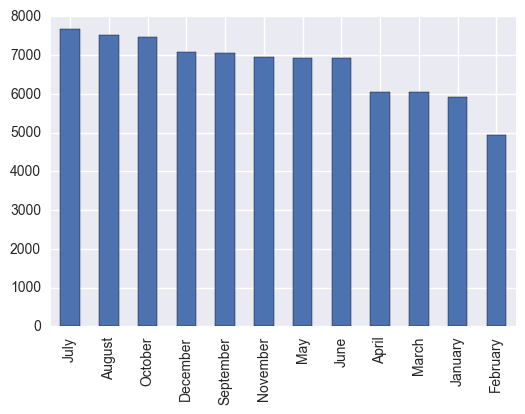

In [67]:
X.MONTH.value_counts().plot(kind='bar')
X.MONTH.value_counts()

Urban                                37590
Rural                                37111
Not Reported                          5559
Trafficway Not in State Inventory      265
Unknown                                 62
Name: RUR_URB, dtype: int64

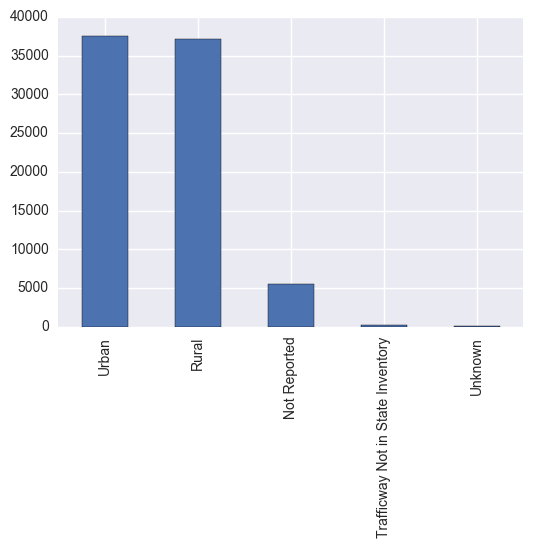

In [68]:
X.RUR_URB.value_counts().plot(kind='bar')
X.RUR_URB.value_counts()

In [69]:
replacements = {
    'RUR_URB': {'Unknown': 'Not Reported'}
    }
X.replace(replacements, regex=True, inplace=True)

Urban                                37590
Rural                                37111
Not Reported                          5621
Trafficway Not in State Inventory      265
Name: RUR_URB, dtype: int64

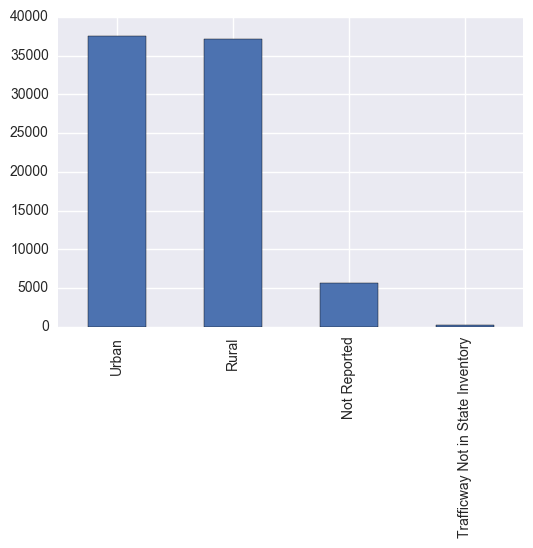

In [70]:
X.RUR_URB.value_counts().plot(kind='bar')
X.RUR_URB.value_counts()

22                    2051
21                    2029
23                    1994
19                    1939
20                    1931
18                    1899
24                    1893
25                    1820
26                    1676
27                    1613
17                    1530
29                    1495
28                    1374
31                    1366
30                    1340
32                    1298
35                    1256
33                    1232
51                    1231
34                    1228
37                    1184
53                    1175
54                    1172
55                    1155
50                    1147
52                    1128
36                    1126
44                    1120
38                    1102
56                    1095
                      ... 
4                      374
11                     369
7                      361
Less than one year     337
77                     330
78                     323
8

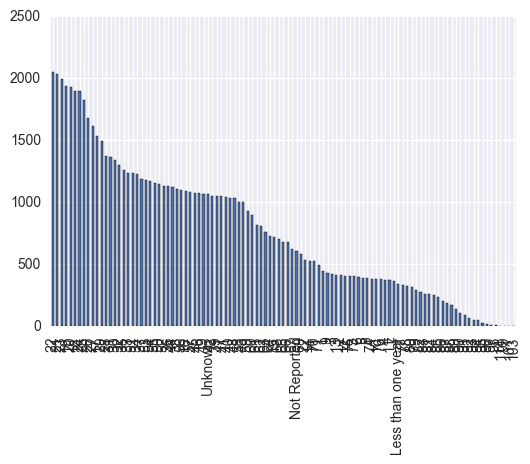

In [71]:
X.AGE.value_counts().plot(kind='bar')
X.AGE.value_counts()

In [72]:
mean =39.27

In [73]:
#Replacing the unknown and not reported values with the mean age and replacing the age with less than one year to 1
replacements = {
    'AGE': {'Unknown|Not Reported': mean, 'Less than one year': 1}
    }
X.replace(replacements, regex=True, inplace=True)

Male            52598
Female          26631
Unknown           969
Not Reported      389
Name: SEX, dtype: int64

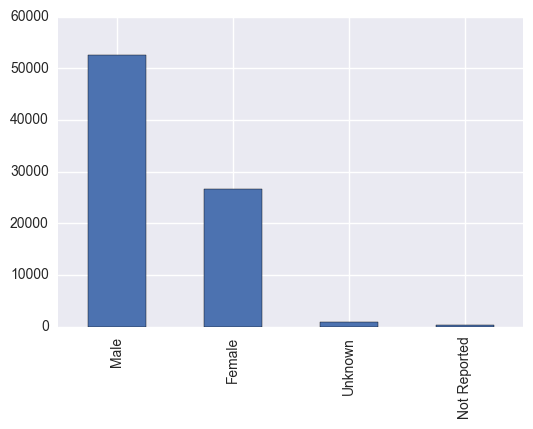

In [74]:
X.SEX.value_counts().plot(kind='bar')
X.SEX.value_counts()

In [75]:
#Replacing Unknown and Not Reporthed sex with Male as this is the majority considering other lables
replacements = {
    'SEX': {'Unknown|Not Reported': 'Male',}
    }
X.replace(replacements, regex=True, inplace=True)

In [76]:
replacements = {
    'PER_TYP': {1:'Driver of a Motor Vehicle In-Transport', 2:'Passenger of a Motor Vehicle In-Transport',
                3:'Occupant of a Motor Vehicle Not In-Transport', 4:'Occupant of a Non-Motor Vehicle Transport Device',
                5:'Pedestrian', 6:'Bicyclist', 7:'Other Cyclist', 8:'Person on Personal Conveyances',
                9:'Unknown Occupant Type in a Motor Vehicle In-Transport', 10:'Persons In or On Buildings',
                19:'Unknown Type of Non-Motorist'}, 
    'INJ_SEV': {0:'No Apparent Injury', 1:'Possible Injury', 2:'Suspected Minor Injury', 3:'Suspected Serious Injury',
                4:'Fatal Injury', 5:'Injured, Severity Unknown', 6:'Died Prior to Crash', 8:'Not Reported', 9:'Unknown'},
    'DRINKING': {0:'No', 1:'Yes', 8:'Not Reported', 9:'Unknown'},
    'ALC_STATUS': {0:'Test Not Given', 1: 'Test Refused', 2:'Test Given', 8:'Not Reported', 9:'Unknown'}
    }
X.replace(replacements, regex=True, inplace=True)

Driver of a Motor Vehicle In-Transport                   48613
Passenger of a Motor Vehicle In-Transport                24646
Pedestrian                                                5795
Bicyclist                                                  851
Occupant of a Motor Vehicle Not In-Transport               286
Person on Personal Conveyances                             167
Unknown Occupant Type in a Motor Vehicle In-Transport      131
Occupant of a Non-Motor Vehicle Transport Device            66
Persons In or On Buildings                                  30
Unknown Type of Non-Motorist                                 1
Other Cyclist                                                1
Name: PER_TYP, dtype: int64

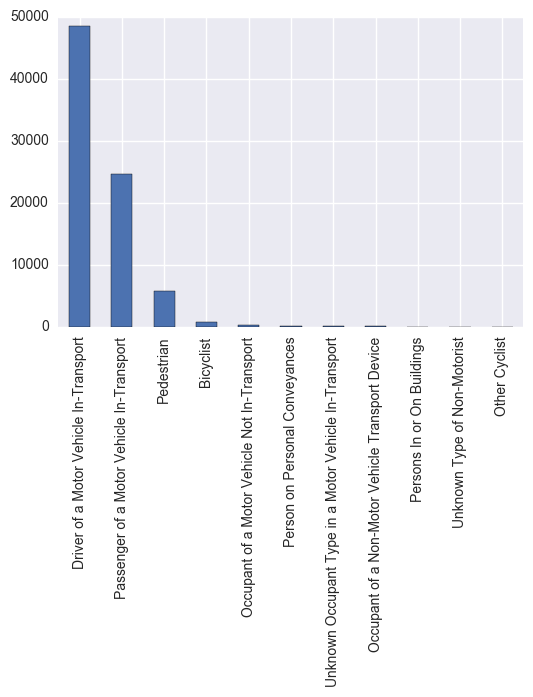

In [77]:
X.PER_TYP.value_counts().plot(kind='bar')
X.PER_TYP.value_counts()

In [78]:
#Cleaning the Person type column
replacements = {
    'PER_TYP': {'Occupant of a Motor Vehicle Not In-Transport|Person on Personal Conveyances|Unknown Occupant Type in a Motor Vehicle In-Transport|Occupant of a Non-Motor Vehicle Transport Device|Persons In or On Buildings|Unknown Type of Non-Motorist|Other Cyclist|Bicyclist': 'Others'}
    }
X.replace(replacements, regex=True, inplace=True)

Driver of a Motor Vehicle In-Transport       48613
Passenger of a Motor Vehicle In-Transport    24646
Pedestrian                                    5795
Others                                        1533
Name: PER_TYP, dtype: int64

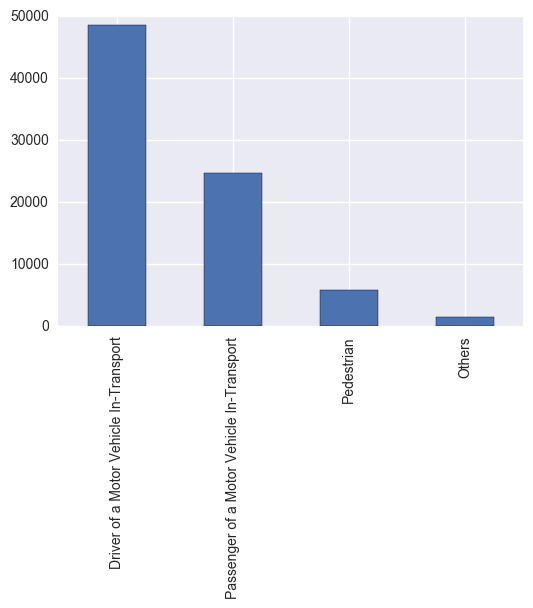

In [79]:
X.PER_TYP.value_counts().plot(kind='bar')
X.PER_TYP.value_counts()

Fatal Injury                 35092
No Apparent Injury           19704
Suspected Minor Injury        9045
Suspected Serious Injury      8324
Possible Injury               7400
Unknown                        770
Injured, Severity Unknown      250
Died Prior to Crash              2
Name: INJ_SEV, dtype: int64

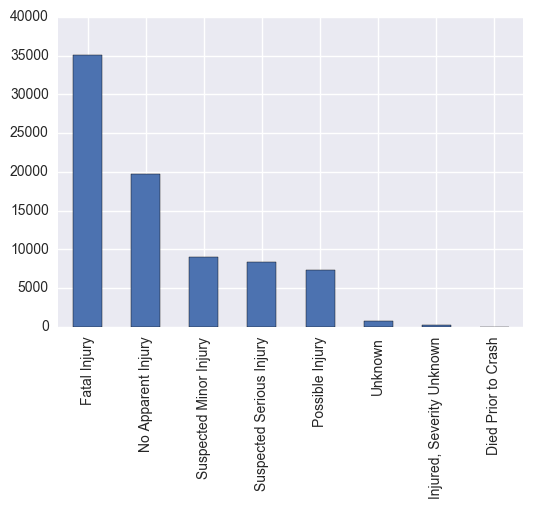

In [80]:
X.INJ_SEV.value_counts().plot(kind='bar')
X.INJ_SEV.value_counts()

In [82]:
replacements = {
    'INJ_SEV': {'Unknown|Injured, Severity Unknown': 'Injured', 'Died Prior to Crash': 'Fatal Injury'}
    }
X.replace(replacements, regex=True, inplace=True)

Fatal Injury                35094
No Apparent Injury          19704
Suspected Minor Injury       9045
Suspected Serious Injury     8324
Possible Injury              7400
Injured                      1020
Name: INJ_SEV, dtype: int64

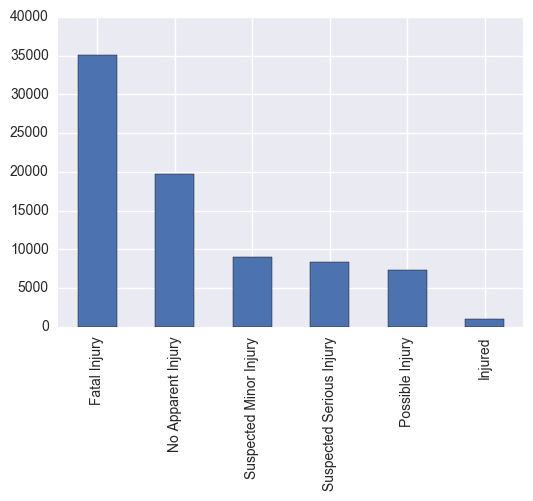

In [83]:
X.INJ_SEV.value_counts().plot(kind='bar')
X.INJ_SEV.value_counts()

In [84]:
#Cleaning Injury severity column
replacements = {
    'INJ_SEV': {'Unknown': 'Not Reproted', 'Suspected Minor Injury| Suspected Serious Injury|Possible Injury':'Injured'}
    }
X.replace(replacements, regex=True, inplace=True)

No              33577
Not Reported    29556
Unknown          9703
Yes              7751
Name: DRINKING, dtype: int64

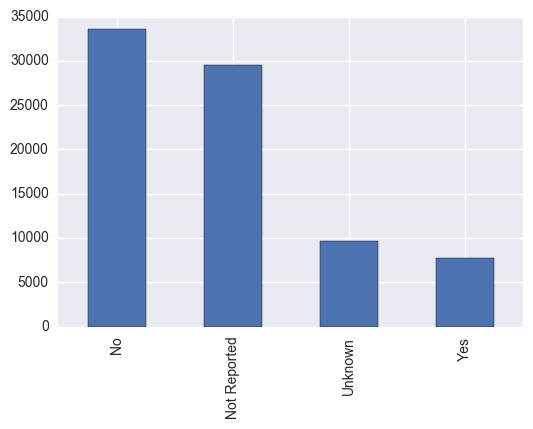

In [85]:
X.DRINKING.value_counts().plot(kind='bar')
X.DRINKING.value_counts()

In [86]:
replacements = {
    'DRINKING': {'Unknown':'Not Reported'}
    }
X.replace(replacements, regex=True, inplace=True)

Test Not Given    43703
Test Given        30215
Not Reported       5967
Unknown             632
Test Refused         70
Name: ALC_STATUS, dtype: int64

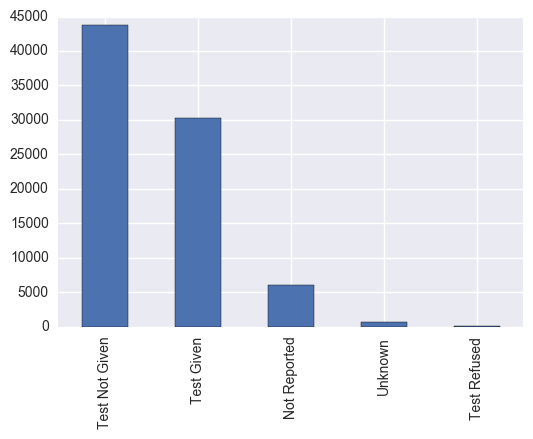

In [87]:
X.ALC_STATUS.value_counts().plot(kind='bar')
X.ALC_STATUS.value_counts()

In [88]:
replacements = {
    'ALC_STATUS': {'Unknown|Test Refused|Not Reported': 'Test Not Given'}
    }
X.replace(replacements, regex=True, inplace=True)

Test Not Given    50372
Test Given        30215
Name: ALC_STATUS, dtype: int64

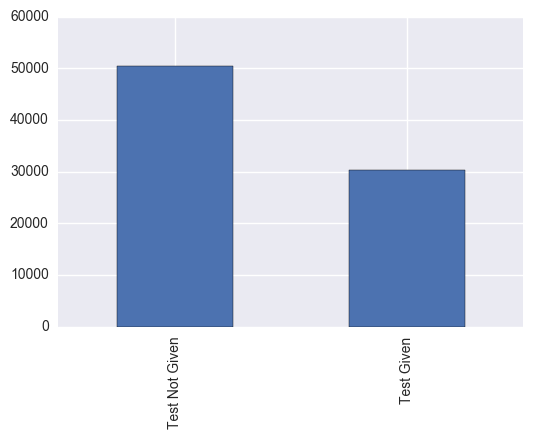

In [89]:
X.ALC_STATUS.value_counts().plot(kind='bar')
X.ALC_STATUS.value_counts()

None Given                                   43773
0.0                                          21073
Legally intoxicated                           8284
Not Reported                                  5967
AC Test Performed, Results Unknown             731
Unknown if Tested                              632
PBT Positive Reading with No Actual Value      127
Name: ALC_RES, dtype: int64

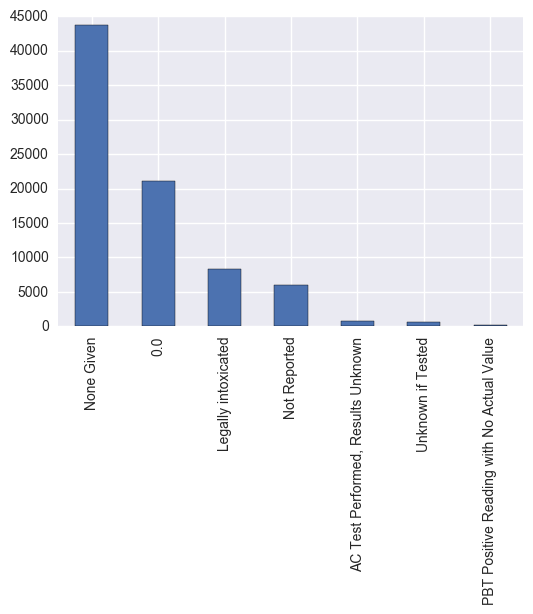

In [90]:
#legal limit for BAC is o.o7 anything above this is value should be considered as the person is not fit to drive
for i in range(80587):
    if X.ALC_RES[i] >= 0 and X.ALC_RES[i] <= 79:
        X.loc[i, 'ALC_RES'] = 0.00
    elif X.ALC_RES[i] >= 10 and X.ALC_RES[i] <= 19:
        X.loc[i, 'ALC_RES'] = 0.01
    elif X.ALC_RES[i] >= 20 and X.ALC_RES[i] <= 29:
        X.loc[i, 'ALC_RES'] = 0.02
    elif X.ALC_RES[i] >= 30 and X.ALC_RES[i] <= 39:
        X.loc[i, 'ALC_RES'] = 0.03
    elif X.ALC_RES[i] >= 40 and X.ALC_RES[i] <= 49:
        X.loc[i, 'ALC_RES'] = 0.04
    elif X.ALC_RES[i] >= 50 and X.ALC_RES[i] <= 59:
        X.loc[i, 'ALC_RES'] = 0.05
    elif X.ALC_RES[i] >= 60 and X.ALC_RES[i] <= 69:
        X.loc[i, 'ALC_RES'] = 0.06
    elif X.ALC_RES[i] >= 70 and X.ALC_RES[i] <= 79:
        X.loc[i, 'ALC_RES'] = 0.07
    elif X.ALC_RES[i] >= 80 and X.ALC_RES[i] <= 994:
        X.loc[i, 'ALC_RES'] = "Legally intoxicated" 
    elif X.ALC_RES[i] == 995:
        X.loc[i, 'ALC_RES'] = "Not Reported"
    elif X.ALC_RES[i] == 996:
        X.loc[i, 'ALC_RES'] = "None Given"
    elif X.ALC_RES[i] == 997:
        X.loc[i, 'ALC_RES'] = "AC Test Performed, Results Unknown"
    elif X.ALC_RES[i] == 998:
        X.loc[i, 'ALC_RES'] = "PBT Positive Reading with No Actual Value"
    elif X.ALC_RES[i] == 999:
        X.loc[i, 'ALC_RES'] = "Unknown if Tested"
X.ALC_RES.value_counts().plot(kind='bar')
X.ALC_RES.value_counts()

In [91]:
#Cleaning Alcohol result column for clear understanding if person is intoxicated or not
replacements = {
    'ALC_RES': {'Unknown if Tested|AC Test Performed, Results Unknown|Unknown if Tested|Not Reproted|PBT Positive Reading with No Actual Value|Not Reported':'None Given'}
    }
X.replace(replacements, regex=True, inplace=True)

None Given             51230
0.0                    21073
Legally intoxicated     8284
Name: ALC_RES, dtype: int64

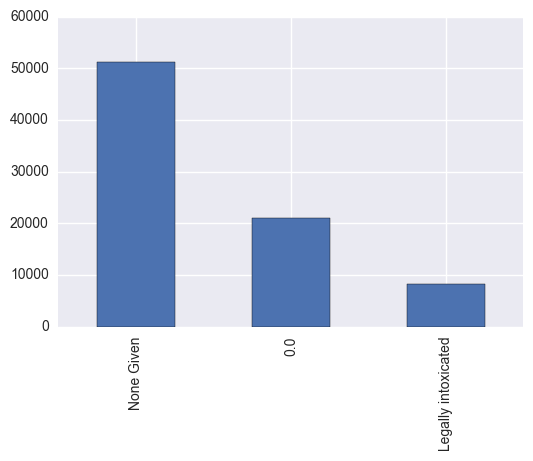

In [92]:
X.ALC_RES.value_counts().plot(kind='bar')
X.ALC_RES.value_counts()

In [93]:
replacements = {
    'DRUGS': {0: 'No', 1:'Yes', 8:'Not Reported', 9:'Unknown'}, 
    'DRUG_DET': {1:'Evidential Test/(Blood, Urine)/', 2:'Drug Recognition Technician Determination', 3:'Behavioral',
                7:'Other', 8:'Not Reported'},
    'DSTATUS': {0:'Test Not Given', 1: 'Test Refused', 2:'Test Given', 8:'Not Reported', 9:'Unknown'},
    'DRUGTST1': {0:'Test Not Given', 1: 'Blood Test', 2:'Urine Test', 3:'Both Blood and Urine Tests',6:'Not Reported',
                 7:'Unknown Test Type', 8:'Other Test Type',9:'Unknown if Tested'},
    'DRUGTST2': {0:'Test Not Given', 1: 'Blood Test', 2:'Urine Test', 3:'Both Blood and Urine Tests',6:'Not Reported',
                 7:'Unknown Test Type', 8:'Other Test Type',9:'Unknown if Tested'},
    'DRUGTST3': {0:'Test Not Given', 1: 'Blood Test', 2:'Urine Test', 3:'Both Blood and Urine Tests',6:'Not Reported',
                 7:'Unknown Test Type', 8:'Other Test Type',9:'Unknown if Tested'}
    }
X.replace(replacements, regex=True, inplace=True)

Not Reported                                 71421
Evidential Test/(Blood, Urine)/               5157
Other                                         3343
Behavioral                                     411
Drug Recognition Technician Determination      255
Name: DRUG_DET, dtype: int64

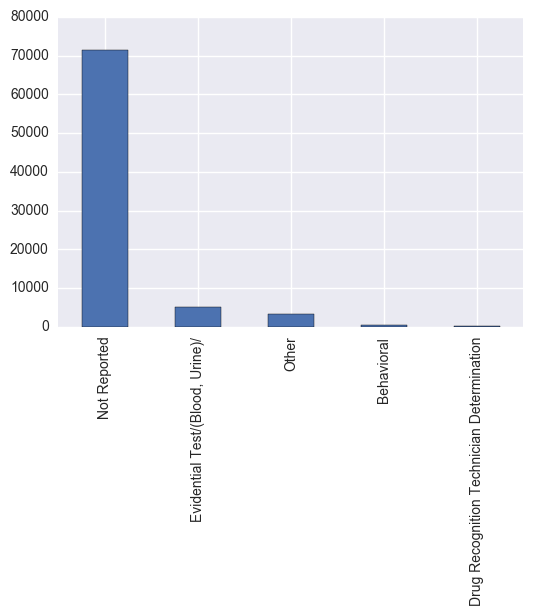

In [94]:
X.DRUG_DET.value_counts().plot(kind='bar')
X.DRUG_DET.value_counts()

In [96]:
replacements = {
    'DRUG_DET': {'Behavioral|Drug Recognition Technician Determination':'Other'}
    }
X.replace(replacements, regex=True, inplace=True)

Test Not Given                49252
Blood Test                    20388
Not Reported                   7528
Both Blood and Urine Tests     1131
Urine Test                     1042
Unknown if Tested               768
Unknown Test Type               312
Other Test Type                 166
Name: DRUGTST1, dtype: int64

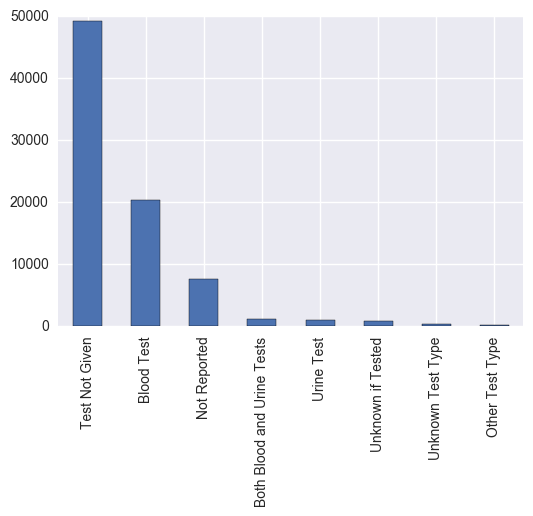

In [95]:
X.DRUGTST1.value_counts().plot(kind='bar')
X.DRUGTST1.value_counts()

Test Not Given    49212
Test Given        23372
Not Reported       7197
Unknown             768
Test Refused         38
Name: DSTATUS, dtype: int64

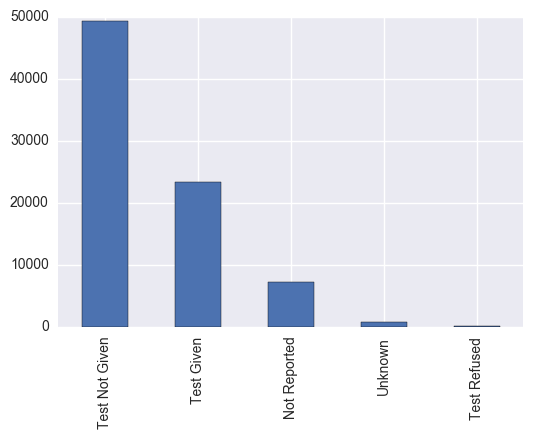

In [97]:
X.DSTATUS.value_counts().plot(kind='bar')
X.DSTATUS.value_counts()

In [98]:
replacements = {
    'DSTATUS': {'Unknown|Test Refused':'Test Not Given'}
    }
X.replace(replacements, regex=True, inplace=True)

In [99]:
#Dropping DSTATUS, DRUG_DET, DRUGTST1, DRUGTST2, DRUGTST3 columns as these only show if the drug test was conducted or not and
#These do not show the result
X = X.drop(['DSTATUS', 'DRUG_DET', 'DRUGTST1', 'DRUGTST2', 'DRUGTST3'], axis=1)

Not Tested for Drugs                                    49251
No Drugs Reported or Negative                           13297
Not Reported                                             7210
Cannabinoid                                              2851
Stimulant                                                1814
Narcotic                                                 1411
Depressant                                               1411
Other Drugs                                              1125
Tested for Drugs, Results Unknown                         975
Unknown if Tested                                         768
Tested for Drugs, Drugs Found, Type Unknown/Positive      388
Hallucinogen                                               56
Phencyclidine                                              23
Inhalant                                                    5
Anabolic Steroid                                            2
Name: DRUGRES1, dtype: int64

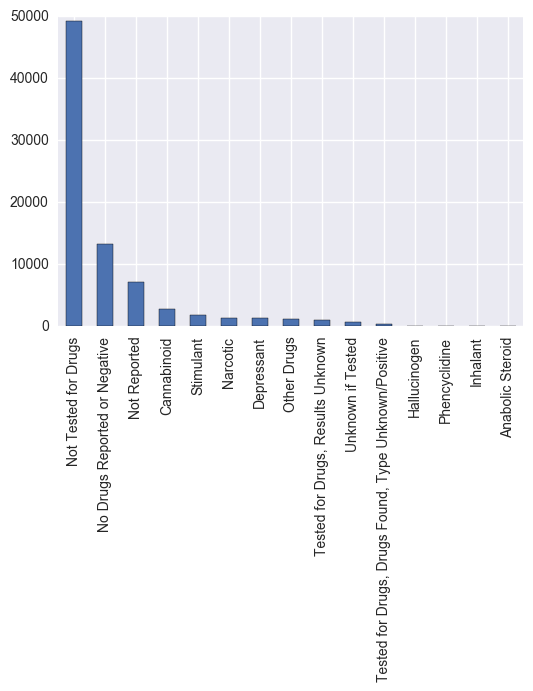

In [100]:
for i in range(80587):
    if X.DRUGRES1[i] == 0:
        X.loc[i, 'DRUGRES1'] = "Not Tested for Drugs"
    elif X.DRUGRES1[i] == 1:
        X.loc[i, 'DRUGRES1'] = "No Drugs Reported or Negative"
    elif X.DRUGRES1[i] == 95:
        X.loc[i, 'DRUGRES1'] = "Not Reported"
    elif X.DRUGRES1[i] >= 100 and X.DRUGRES1[i] <= 295:
        X.loc[i, 'DRUGRES1'] = "Narcotic"
    elif X.DRUGRES1[i] >= 300 and X.DRUGRES1[i] <= 399:
        X.loc[i, 'DRUGRES1'] = "Depressant"
    elif X.DRUGRES1[i] >= 400 and X.DRUGRES1[i] <= 495:
        X.loc[i, 'DRUGRES1'] = "Stimulant"
    elif X.DRUGRES1[i] >= 500 and X.DRUGRES1[i] <= 595:
        X.loc[i, 'DRUGRES1'] = "Hallucinogen"
    elif X.DRUGRES1[i] >= 600 and X.DRUGRES1[i] <= 695:
        X.loc[i, 'DRUGRES1'] = "Cannabinoid"
    elif X.DRUGRES1[i] >= 700 and X.DRUGRES1[i] <= 795:
        X.loc[i, 'DRUGRES1'] = "Phencyclidine"
    elif X.DRUGRES1[i] >= 800 and X.DRUGRES1[i] <= 895:
        X.loc[i, 'DRUGRES1'] = "Anabolic Steroid"
    elif X.DRUGRES1[i] >= 900 and X.DRUGRES1[i] <= 995:
        X.loc[i, 'DRUGRES1'] = "Inhalant"
    elif X.DRUGRES1[i] == 996:
        X.loc[i, 'DRUGRES1'] = "Other Drugs"
    elif X.DRUGRES1[i] == 997:
        X.loc[i, 'DRUGRES1'] = "Tested for Drugs, Results Unknown"
    elif X.DRUGRES1[i] == 998:
        X.loc[i, 'DRUGRES1'] = "Tested for Drugs, Drugs Found, Type Unknown/Positive"
    elif X.DRUGRES1[i] == 999:
        X.loc[i, 'DRUGRES1'] = "Unknown if Tested"

X.DRUGRES1.value_counts().plot(kind='bar')
X.DRUGRES1.value_counts() 
   

Not Tested for Drugs                                    76095
Stimulant                                                1226
Cannabinoid                                              1160
Depressant                                                764
Other Drugs                                               631
Narcotic                                                  610
Tested for Drugs, Drugs Found, Type Unknown/Positive       49
Hallucinogen                                               34
Phencyclidine                                               9
No Drugs Reported or Negative                               7
Tested for Drugs, Results Unknown                           1
Inhalant                                                    1
Name: DRUGRES2, dtype: int64

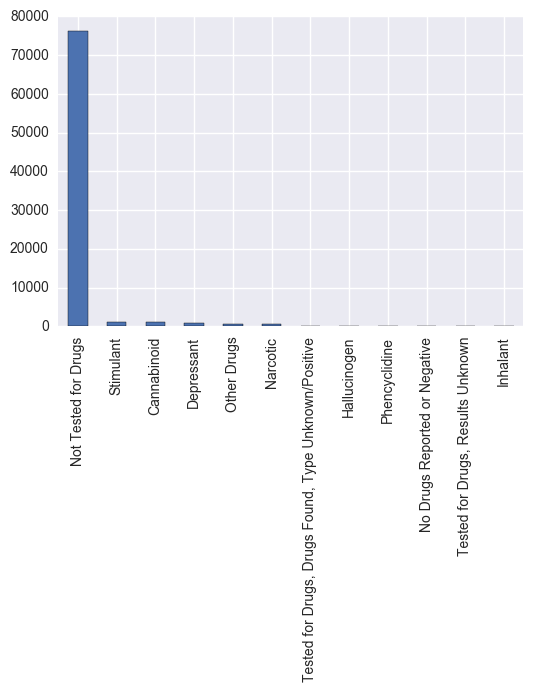

In [101]:
for i in range(80587):
    if X.DRUGRES2[i] == 0:
        X.loc[i, 'DRUGRES2'] = "Not Tested for Drugs"
    elif X.DRUGRES2[i] == 1:
        X.loc[i, 'DRUGRES2'] = "No Drugs Reported or Negative"
    elif X.DRUGRES2[i] == 95:
        X.loc[i, 'DRUGRES2'] = "Not Reported"
    elif X.DRUGRES2[i] >= 100 and X.DRUGRES2[i] <= 295:
        X.loc[i, 'DRUGRES2'] = "Narcotic"
    elif X.DRUGRES2[i] >= 300 and X.DRUGRES2[i] <= 399:
        X.loc[i, 'DRUGRES2'] = "Depressant"
    elif X.DRUGRES2[i] >= 400 and X.DRUGRES2[i] <= 495:
        X.loc[i, 'DRUGRES2'] = "Stimulant"
    elif X.DRUGRES2[i] >= 500 and X.DRUGRES2[i] <= 595:
        X.loc[i, 'DRUGRES2'] = "Hallucinogen"
    elif X.DRUGRES2[i] >= 600 and X.DRUGRES2[i] <= 695:
        X.loc[i, 'DRUGRES2'] = "Cannabinoid"
    elif X.DRUGRES2[i] >= 700 and X.DRUGRES2[i] <= 795:
        X.loc[i, 'DRUGRES2'] = "Phencyclidine"
    elif X.DRUGRES2[i] >= 800 and X.DRUGRES2[i] <= 895:
        X.loc[i, 'DRUGRES2'] = "Anabolic Steroid"
    elif X.DRUGRES2[i] >= 900 and X.DRUGRES2[i] <= 995:
        X.loc[i, 'DRUGRES2'] = "Inhalant"
    elif X.DRUGRES2[i] == 996:
        X.loc[i, 'DRUGRES2'] = "Other Drugs"
    elif X.DRUGRES2[i] == 997:
        X.loc[i, 'DRUGRES2'] = "Tested for Drugs, Results Unknown"
    elif X.DRUGRES2[i] == 998:
        X.loc[i, 'DRUGRES2'] = "Tested for Drugs, Drugs Found, Type Unknown/Positive"
    elif X.DRUGRES2[i] == 999:
        X.loc[i, 'DRUGRES2'] = "Unknown if Tested"

X.DRUGRES2.value_counts().plot(kind='bar')
X.DRUGRES2.value_counts()

Not Tested for Drugs                                    78531
Cannabinoid                                               502
Other Drugs                                               487
Stimulant                                                 369
Depressant                                                364
Narcotic                                                  278
Tested for Drugs, Drugs Found, Type Unknown/Positive       24
Hallucinogen                                               12
No Drugs Reported or Negative                              12
Phencyclidine                                               7
Inhalant                                                    1
Name: DRUGRES3, dtype: int64

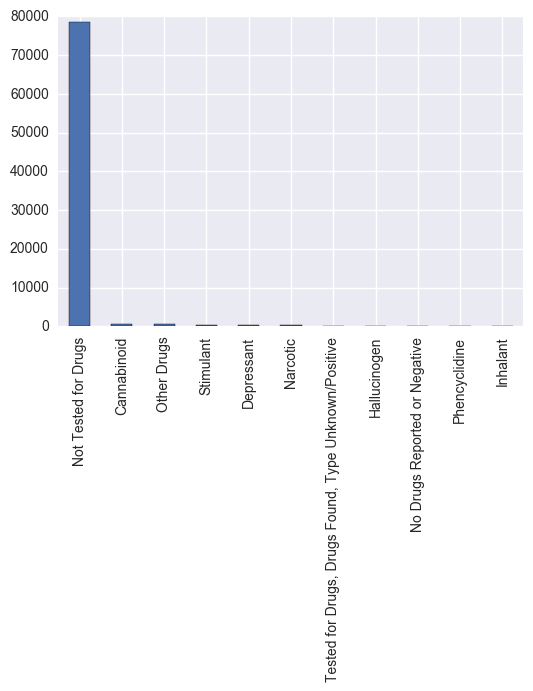

In [102]:
for i in range(80587):
    if X.DRUGRES3[i] == 0:
        X.loc[i, 'DRUGRES3'] = "Not Tested for Drugs"
    elif X.DRUGRES3[i] == 1:
        X.loc[i, 'DRUGRES3'] = "No Drugs Reported or Negative"
    elif X.DRUGRES3[i] == 95:
        X.loc[i, 'DRUGRES3'] = "Not Reported"
    elif X.DRUGRES3[i] >= 100 and X.DRUGRES3[i] <= 295:
        X.loc[i, 'DRUGRES3'] = "Narcotic"
    elif X.DRUGRES3[i] >= 300 and X.DRUGRES3[i] <= 399:
        X.loc[i, 'DRUGRES3'] = "Depressant"
    elif X.DRUGRES3[i] >= 400 and X.DRUGRES3[i] <= 495:
        X.loc[i, 'DRUGRES3'] = "Stimulant"
    elif X.DRUGRES3[i] >= 500 and X.DRUGRES3[i] <= 595:
        X.loc[i, 'DRUGRES3'] = "Hallucinogen"
    elif X.DRUGRES3[i] >= 600 and X.DRUGRES3[i] <= 695:
        X.loc[i, 'DRUGRES3'] = "Cannabinoid"
    elif X.DRUGRES3[i] >= 700 and X.DRUGRES3[i] <= 795:
        X.loc[i, 'DRUGRES3'] = "Phencyclidine"
    elif X.DRUGRES3[i] >= 800 and X.DRUGRES3[i] <= 895:
        X.loc[i, 'DRUGRES3'] = "Anabolic Steroid"
    elif X.DRUGRES3[i] >= 900 and X.DRUGRES3[i] <= 995:
        X.loc[i, 'DRUGRES3'] = "Inhalant"
    elif X.DRUGRES3[i] == 996:
        X.loc[i, 'DRUGRES3'] = "Other Drugs"
    elif X.DRUGRES3[i] == 997:
        X.loc[i, 'DRUGRES3'] = "Tested for Drugs, Results Unknown"
    elif X.DRUGRES3[i] == 998:
        X.loc[i, 'DRUGRES3'] = "Tested for Drugs, Drugs Found, Type Unknown/Positive"
    elif X.DRUGRES3[i] == 999:
        X.loc[i, 'DRUGRES3'] = "Unknown if Tested"

X.DRUGRES3.value_counts().plot(kind='bar')
X.DRUGRES3.value_counts()

In [105]:
#Cleaning Drug result columns as we are only intrested in Cannabinoid
replacements = {
    'DRUGRES1': {'Unknown if Tested': 'Not Tested for Drugs',
                 'Tested for Drugs, Results Unknown':'Not Reported',
                 'No Drugs Reported or Negative':'Reported Negative',
                 'Stimulant|Depressant|Narcotic|Hallucinogen|Phencyclidine|Inhalant|Anabolic Steroid|Tested for Drugs, Drugs Found, Type Unknown/Positive': 'Other Drugs'},
    'DRUGRES2': {'Unknown if Tested': 'Not Tested for Drugs',
                 'Tested for Drugs, Results Unknown':'Not Reported',
                 'No Drugs Reported or Negative':'Reported Negative',
                 'Stimulant|Depressant|Narcotic|Hallucinogen|Phencyclidine|Inhalant|Anabolic Steroid|Tested for Drugs, Drugs Found, Type Unknown/Positive': 'Other Drugs'},
    'DRUGRES3': {'Unknown if Tested': 'Not Tested for Drugs',
                 'Tested for Drugs, Results Unknown':'Not Reported',
                 'No Drugs Reported or Negative':'Reported Negative',
                 'Stimulant|Depressant|Narcotic|Hallucinogen|Phencyclidine|Inhalant|Anabolic Steroid|Tested for Drugs, Drugs Found, Type Unknown/Positive': 'Other Drugs'}
                
}
X.replace(replacements, regex=True, inplace=True)

Not Tested for Drugs    50019
Reported Negative       13297
Not Reported             8185
Other Drugs              6235
Cannabinoid              2851
Name: DRUGRES1, dtype: int64

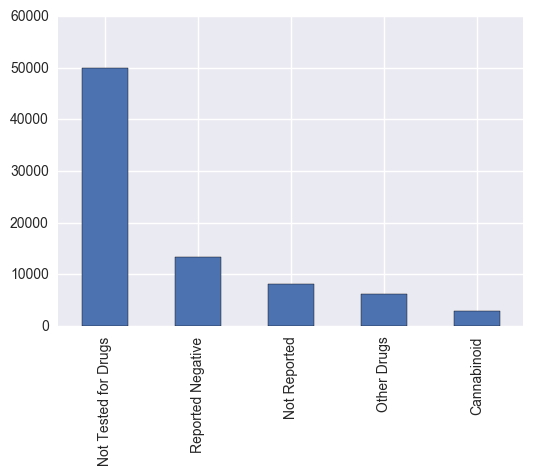

In [106]:
X.DRUGRES1.value_counts().plot(kind='bar')
X.DRUGRES1.value_counts()

Not Tested for Drugs    76095
Other Drugs              3324
Cannabinoid              1160
Reported Negative           7
Not Reported                1
Name: DRUGRES2, dtype: int64

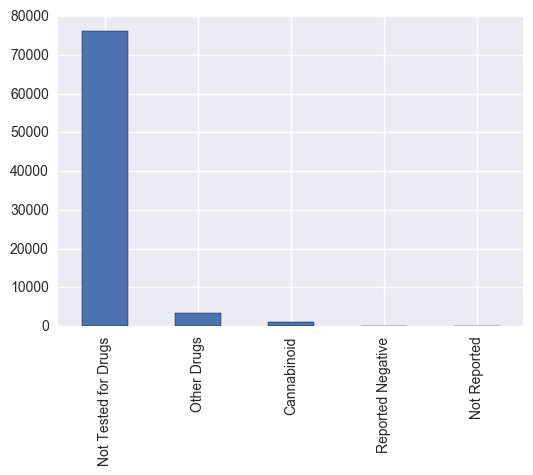

In [107]:
X.DRUGRES2.value_counts().plot(kind='bar')
X.DRUGRES2.value_counts()

Not Tested for Drugs    78531
Other Drugs              1542
Cannabinoid               502
Reported Negative          12
Name: DRUGRES3, dtype: int64

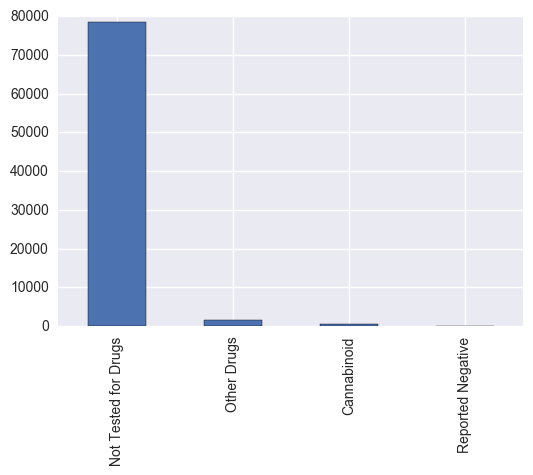

In [108]:
X.DRUGRES3.value_counts().plot(kind='bar')
X.DRUGRES3.value_counts()

In [109]:
replacements = {
    'DOA': {0: 'Not Applicable', 7:'Died at Scene', 8:'Died En Route', 9:'Unknown'}, 
    'DEATH_MO': {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September',
                 10:'October', 11:'November', 12:'December', 88:'NA - Non Fatal', 99:'Unknown'},
    'DEATH_DA': {88:'NA - Non Fatal', 99:'Unknown'},
    'WORK_INJ': {0:'No', 1: 'Yes', 8:'Not Applicable',9:'Unknown'},
    'RACE': {0:'Not A Fatality', 1:'White', 2:'Black', 3:'American Indian /(Includes Aleuts and Eskimos)/', 4:'Chinese',
             5:'Japanese', 6:'Hawaiian /(Includes Part-Hawaiian)', 7:'Filipino', 18:'Asian Indian',
             19:'Other Indian /(Includes South and Central America', 28:'Korean', 38:'Samoan', 48:'Vietnamese',
             58:'Guamanian', 68:'Other Asian or Pacific Islander', 78:'Asian Or Pacific Islander, No Specific Race',
             97:'Multiple Races', 98:'All Other Races', 99:'Unknown'}
    }
X.replace(replacements, regex=True, inplace=True)

Not Applicable    60182
Died at Scene     20003
Died En Route       372
Unknown              30
Name: DOA, dtype: int64

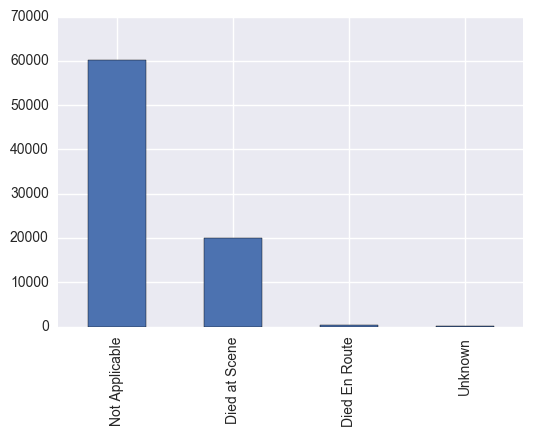

In [110]:
X.DOA.value_counts().plot(kind='bar')
X.DOA.value_counts()

In [111]:
# Cleaning died at scene/en route column
replacements = {
    'DOA': {'Unknown':'Not Applicable'}
    
    }
X.replace(replacements, regex=True, inplace=True)

NA - Non Fatal    45495
August             3312
October            3231
July               3220
September          3090
May                3077
December           3052
June               2972
November           2938
April              2632
March              2575
January            2546
February           2146
Unknown             301
Name: DEATH_MO, dtype: int64

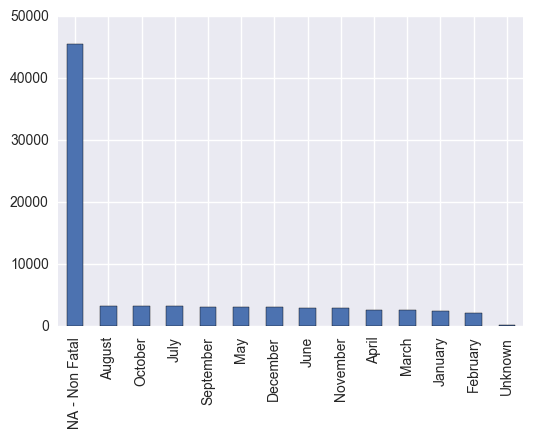

In [112]:
X.DEATH_MO.value_counts().plot(kind='bar')
X.DEATH_MO.value_counts()

In [113]:
#cleaning month of death column
replacements = {
    'DEATH_MO': {'Unknown':'NA - Non Fatal'}
    
    }
X.replace(replacements, regex=True, inplace=True)

NA - Non Fatal    45495
3                  1214
4                  1202
12                 1190
6                  1187
7                  1186
5                  1179
26                 1175
14                 1172
11                 1171
17                 1160
18                 1158
25                 1149
24                 1148
21                 1145
19                 1144
10                 1139
15                 1136
1                  1135
22                 1131
16                 1126
27                 1124
13                 1123
20                 1122
2                  1107
23                 1102
9                  1102
8                  1097
28                 1057
30                 1032
29                  965
31                  696
Unknown             318
Name: DEATH_DA, dtype: int64

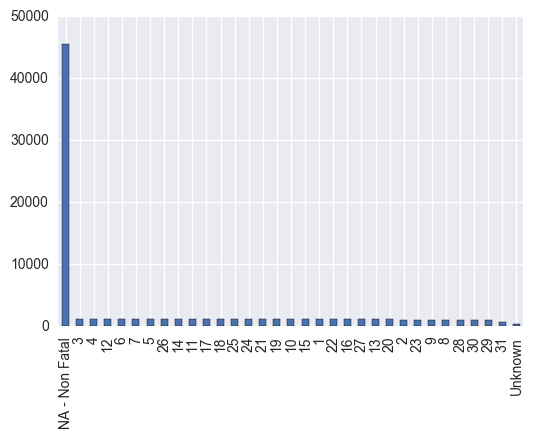

In [114]:
X.DEATH_DA.value_counts().plot(kind='bar')
X.DEATH_DA.value_counts()

In [115]:
replacements = {
    'DEATH_DA': {'Unknown':'NA - Non Fatal'}
    
    }
X.replace(replacements, regex=True, inplace=True)

Not Applicable    45495
No                29811
Unknown            4451
Yes                 830
Name: WORK_INJ, dtype: int64

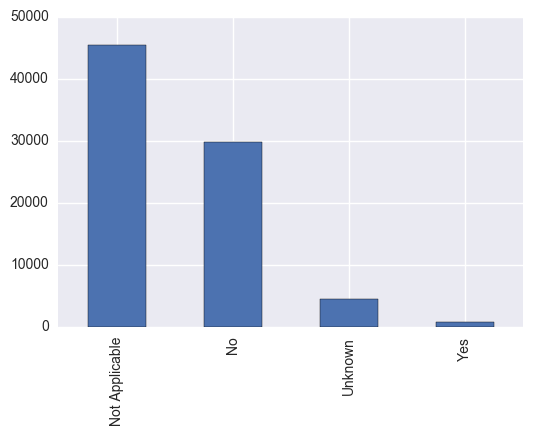

In [116]:
X.WORK_INJ.value_counts().plot(kind='bar')
X.WORK_INJ.value_counts()

In [117]:
replacements = {
    'WORK_INJ': {'Unknown':'Not Applicable'}
    
    }
X.replace(replacements, regex=True, inplace=True)

Not A Fatality                                       45495
White                                                24100
Black                                                 4718
Unknown                                               4497
American Indian /(Includes Aleuts and Eskimos)/        594
All Other Races                                        397
Other Asian or Pacific Islander                        117
Chinese                                                116
Asian Indian                                           115
Filipino                                                75
Multiple Races                                          74
Asian Or Pacific Islander, No Specific Race             64
Other Indian /(Includes South and Central America       58
Vietnamese                                              44
Hawaiian /(Includes Part-Hawaiian)                      39
Korean                                                  36
Japanese                                                

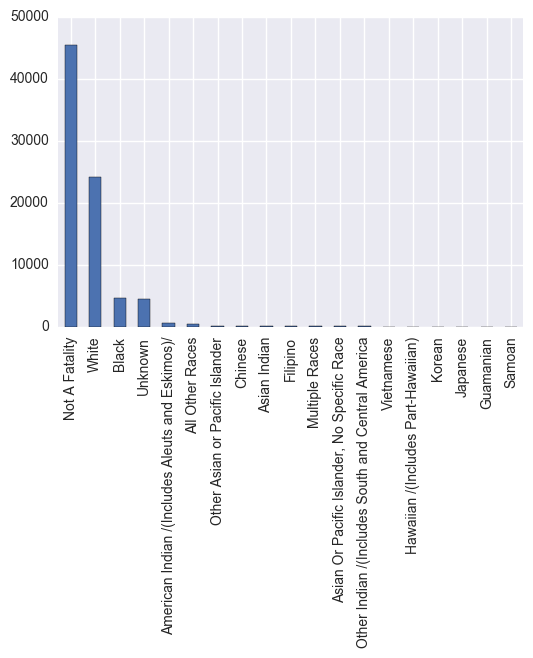

In [118]:
X.RACE.value_counts().plot(kind='bar')
X.RACE.value_counts()

In [139]:
#Cleaning RACE Column
replacements = {
    'RACE': {'Unknown|Multiple Races|American Indian /\(Includes Aleuts and Eskimos\)\/|Samoan|Guamanian|Hawaiian /\(\Includes Part-Hawaiian\)|Other Indian /\(\Includes South and Central America':'All Other Races',
             'Other Asian or Pacific Islander|Chinese|Asian Indian|Filipino|Asian Or Pacific Islander, No Specific Race|Vietnamese|Korean|Japanese':'Asian'}, 
    
    }
X.replace(replacements, regex=True, inplace=True)

Not A Fatality     45495
White              24100
All Other Races     5675
Black               4718
Asian                599
Name: RACE, dtype: int64

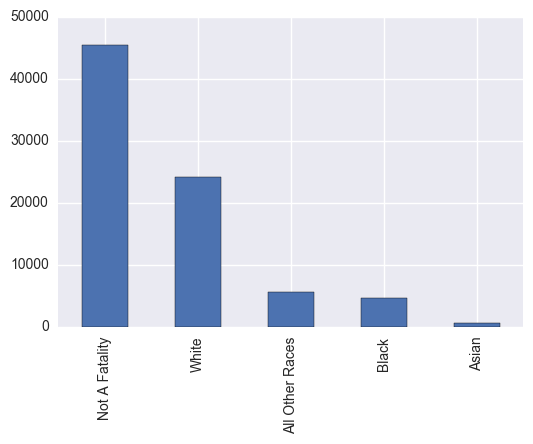

In [140]:
X.RACE.value_counts().plot(kind='bar')
X.RACE.value_counts()

Not A Fatality                                    45495
Non-Hispanic                                      25089
Unknown                                            5884
Mexican                                            2018
Hispanic, Origin Not Specified or Other Origin     1263
Puerto Rican                                        287
Cuban                                               206
Central or South American                           190
European Spanish                                    155
Name: HISPANIC, dtype: int64

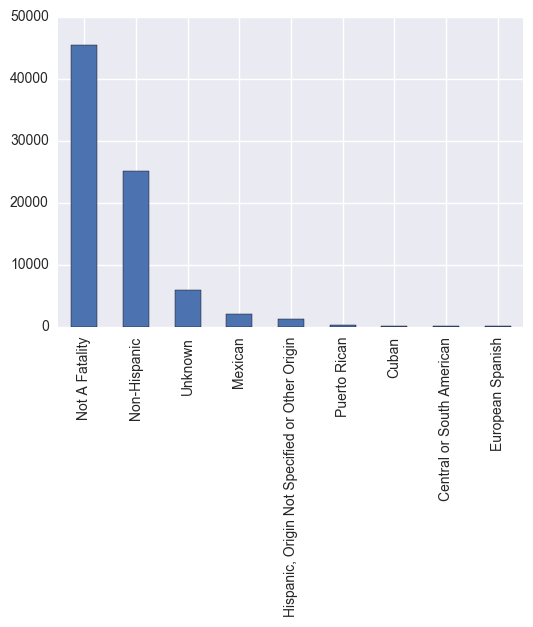

In [141]:
replacements = {
    'HISPANIC': {0: 'Not A Fatality', 1:'Mexican', 2:'Puerto Rican', 3:'Cuban', 4:'Central or South American',
                 5:'European Spanish', 6:'Hispanic, Origin Not Specified or Other Origin', 7:'Non-Hispanic', 99:'Unknown'}, 
    
    }
X.replace(replacements, regex=True, inplace=True)
X.HISPANIC.value_counts().plot(kind='bar')
X.HISPANIC.value_counts()

In [137]:
X.head()

,STATE,ST_CASE,PER_NO,DAY,MONTH,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,...,DRUGS,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE
0,Alabama,10001,1,1,January,Rural,68.0,Male,Driver of a Motor Vehicle In-Transport,Fatal Injury,...,Unknown,Reported Negative,Not Tested for Drugs,Not Tested for Drugs,Died at Scene,1,January,No,Non-Hispanic,White
1,Alabama,10002,1,1,January,Rural,49.0,Male,Driver of a Motor Vehicle In-Transport,Fatal Injury,...,No,Other Drugs,Other Drugs,Other Drugs,Died at Scene,1,January,No,Non-Hispanic,White
2,Alabama,10003,1,1,January,Rural,31.0,Male,Driver of a Motor Vehicle In-Transport,Fatal Injury,...,Unknown,Reported Negative,Not Tested for Drugs,Not Tested for Drugs,Died at Scene,1,January,No,Non-Hispanic,Black
3,Alabama,10003,2,1,January,Rural,20.0,Female,Passenger of a Motor Vehicle In-Transport,Injured,...,Not Reported,Not Tested for Drugs,Not Tested for Drugs,Not Tested for Drugs,Not Applicable,NA - Non Fatal,NA - Non Fatal,Not Applicable,Not A Fatality,Not A Fatality
4,Alabama,10004,1,4,January,Rural,40.0,Male,Driver of a Motor Vehicle In-Transport,Fatal Injury,...,Unknown,Reported Negative,Not Tested for Drugs,Not Tested for Drugs,Died at Scene,4,January,No,Non-Hispanic,White


In [142]:
X.to_csv('project_EDA.csv', index=False)

### Continuing with Project_EDA-Numeric